<a href="https://colab.research.google.com/github/Farhan99-hub/Deep_Learning/blob/main/ai_face_detection/AI_face_detection_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install -q kaggle

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"farhansanaansari","key":"b6d000edb732891a838b0043b11c7177"}'}

In [4]:
!mkdir ~/.kaggle

In [5]:
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets list

ref                                                           title                                              size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
stealthtechnologies/predict-student-performance-dataset       Predict Student Performance                        12KB  2024-12-26 12:57:04           2345         61  1.0              
ankushpanday1/heart-attack-in-youth-of-india                  Heart attack in youth of India                    298KB  2025-01-02 15:20:31           1369         35  1.0              
realhamzanet/world-health-indicators-dataset                  World Health Indicators Dataset                    13MB  2024-12-31 10:15:57            817         24  1.0              
simronw/tesla-stock-data-2024                                 TESLA Stock Data 2

In [6]:
!kaggle datasets download shahzaibshazoo/detect-ai-generated-faces-high-quality-dataset

Dataset URL: https://www.kaggle.com/datasets/shahzaibshazoo/detect-ai-generated-faces-high-quality-dataset
License(s): apache-2.0
 80% 92.0M/116M [00:01<00:00, 85.6MB/s]
100% 116M/116M [00:01<00:00, 103MB/s]  


In [7]:
!unzip detect-ai-generated-faces-high-quality-dataset.zip

Archive:  detect-ai-generated-faces-high-quality-dataset.zip
  inflating: AI-face-detection-Dataset/AI/0_20241130135552_A_close-up_shot_of_a_middle-aged_genderqueer_perso.jpg  
  inflating: AI-face-detection-Dataset/AI/100_20241130141829_A_close-up_shot_of_a_middle-aged_male_person_of_Na.jpg  
  inflating: AI-face-detection-Dataset/AI/101_20241130141840_A_close-up_shot_of_a_young_adult_non-binary_person.jpg  
  inflating: AI-face-detection-Dataset/AI/102_20241130141854_A_close-up_shot_of_a_middle-aged_male_person_of_Mi.jpg  
  inflating: AI-face-detection-Dataset/AI/103_20241130141904_A_close-up_shot_of_a_child_non-binary_person_of_Pa.jpg  
  inflating: AI-face-detection-Dataset/AI/104_20241130141919_A_close-up_shot_of_a_elderly_male_person_of_Middle.jpg  
  inflating: AI-face-detection-Dataset/AI/105_20241130141930_A_close-up_shot_of_a_elderly_male_person_of_Asian_.jpg  
  inflating: AI-face-detection-Dataset/AI/106_20241130141942_A_close-up_shot_of_a_elderly_female_person_of_Mixe.jpg

In [8]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [9]:
ai_face = '/content/AI-face-detection-Dataset/AI'
real_face = '/content/AI-face-detection-Dataset/real'
num_of_ai_face = len(os.listdir(ai_face))
num_of_real_face = len(os.listdir(real_face))
print(f'Number of AI faces: {num_of_ai_face}')
print(f'Number of real faces: {num_of_real_face}')

Number of AI faces: 1001
Number of real faces: 2202


In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2

ai_src = '/content/AI-face-detection-Dataset/AI'
ai_dest = '/content/AI-face-detection-Dataset/AI'

datagen = ImageDataGenerator(rotation_range = 20,
                             width_shift_range = 0.2,
                             height_shift_range = 0.2,
                             shear_range = 0.2,
                             zoom_range = 0.2,
                             horizontal_flip = True,
                             fill_mode = 'nearest')
for image in os.listdir(ai_src):
  img_path = os.path.join(ai_src, image)
  img = cv2.imread(img_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img = img.reshape((1,) + img.shape)
  for batch in datagen.flow(img, batch_size = 1, save_to_dir = ai_dest, save_prefix = 'aug', save_format = 'jpeg'):
    break

In [11]:
num_of_ai_face = len(os.listdir(ai_face))
num_of_real_face = len(os.listdir(real_face))
print(f'Number of AI faces: {num_of_ai_face}')
print(f'Number of real faces: {num_of_real_face}')

Number of AI faces: 1959
Number of real faces: 2202


In [12]:
ai_src = '/content/AI-face-detection-Dataset/AI'
ai_dest= '/content/AI-face-detection-Dataset/AI'
i=1
for img in os.listdir(ai_src):
  src = os.path.join(ai_src, img)
  dst = os.path.join(ai_dest, "ai_" + str(i) + ".jpeg")
  os.rename(src,dst)
  i+=1
print("ai images renamed")

ai images renamed


In [13]:
real_src = '/content/AI-face-detection-Dataset/real'
real_dest= '/content/AI-face-detection-Dataset/real'
j=1
for img in os.listdir(real_src):
  src = os.path.join(real_src, img)
  dst = os.path.join(real_dest, "real_" + str(j) + ".jpeg")
  os.rename(src,dst)
  j+=1
print("real images renamed")

real images renamed


preprocessing images

In [14]:
# preprocessing images
ai_src='/content/AI-face-detection-Dataset/AI'
for img in os.listdir(ai_src):
  img_path = os.path.join(ai_src, img)
  img = Image.open(img_path)

  # Check if the image was loaded successfully
  if img is not None:
    img = img.resize((244,244))  # Resize only if image is valid
    img = img.convert("RGB")
    img.save(img_path)
  else:
    print(f"Failed to load image: {img_path}")  # Print an error message and skip processing
    continue # Skip to the next image in the loop

real_src='/content/AI-face-detection-Dataset/real'
for img in os.listdir(real_src):
  img_path = os.path.join(real_src, img)
  img = Image.open(img_path)

  # Check if the image was loaded successfully
  if img is not None:
    img = img.resize((244,244))  # Resize only if image is valid
    img = img.convert("RGB")
    img.save(img_path)
  else:
    print(f"Failed to load image: {img_path}")  # Print an error message and skip processing
    continue # Skip to the next image in the loop

In [15]:
import shutil # Import the shutil library

ai_src='/content/AI-face-detection-Dataset/AI'
real_src='/content/AI-face-detection-Dataset/real'

train_dir = '/content/AI-face-detection-Dataset/train'
test_dir = '/content/AI-face-detection-Dataset/test'
val_dir = '/content/AI-face-detection-Dataset/val'

os.makedirs(os.path.join(train_dir, 'ai'), exist_ok=True)
os.makedirs(os.path.join(train_dir, 'real'), exist_ok=True)
os.makedirs(os.path.join(test_dir, 'ai'), exist_ok=True)
os.makedirs(os.path.join(test_dir, 'real'), exist_ok=True)
os.makedirs(os.path.join(val_dir, 'ai'), exist_ok=True)
os.makedirs(os.path.join(val_dir, 'real'), exist_ok=True)

def split_data(source_dir, train_dir, test_dir, val_dir, split_ratio):
    images = [f for f in os.listdir(source_dir) if os.path.isfile(os.path.join(source_dir, f))]
    random.shuffle(images) # Correctly indented line

    train_split = int(len(images) * split_ratio[0])
    test_split = int(len(images) * (split_ratio[0] + split_ratio[1]))

    train_images = images[:train_split]
    test_images = images[train_split:test_split]
    val_images = images[test_split:]

    for image in train_images:
        source_path = os.path.join(source_dir, image)
        destination_path = os.path.join(train_dir, image)
        shutil.copy(source_path, destination_path)

    for image in test_images:
        source_path = os.path.join(source_dir, image)
        destination_path = os.path.join(test_dir, image)
        shutil.copy(source_path, destination_path)

    for image in val_images:
        source_path = os.path.join(source_dir, image)
        destination_path = os.path.join(val_dir, image)
        shutil.copy(source_path, destination_path)

# Split nai images
split_data(ai_src, os.path.join(train_dir, 'ai'), os.path.join(test_dir, 'ai'), os.path.join(val_dir, 'ai'), [0.7,0.15])

# Split real images
split_data(real_src, os.path.join(train_dir, 'real'), os.path.join(test_dir, 'real'), os.path.join(val_dir, 'real'), [0.7,0.15])

In [16]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

In [17]:
train_generator = train_datagen.flow_from_directory(
    '/content/AI-face-detection-Dataset/train',
    target_size=(244, 244),
    batch_size=32,
    class_mode='categorical'
)
test_generator = test_datagen.flow_from_directory(
    '/content/AI-face-detection-Dataset/test',
    target_size=(244, 244),
    batch_size=32,
    class_mode='categorical'
)
val_generator = val_datagen.flow_from_directory(
    '/content/AI-face-detection-Dataset/val',
    target_size=(244, 244),
    batch_size=32,
    class_mode='categorical'
)

Found 2912 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 625 images belonging to 2 classes.


In [18]:
class_label = train_generator.class_indices
class_name = list(class_label.keys())
print(class_label)

{'ai': 0, 'real': 1}


Model Building

In [19]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, GlobalAveragePooling2D, Flatten, Dense, Dropout, Activation, MaxPooling2D #Added Activation and MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
model = Sequential()

# First Convolutional Block
model.add(Conv2D(64, (3, 3), input_shape=(244, 244, 3)))
model.add(Activation("relu")) #Corrected
model.add(MaxPooling2D(2, 2))

# Second Convolutional Block
model.add(Conv2D(128, (3, 3)))
model.add(Activation("relu")) #Corrected
model.add(MaxPooling2D(2, 2))

# Third Convolutional Block
model.add(Conv2D(128, (3, 3)))
model.add(Activation("relu")) #Corrected
model.add(MaxPooling2D(2, 2))

# Fourth Convolutional Block
model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu")) #Corrected
model.add(MaxPooling2D(2, 2))

model.add(Flatten())

# Fully Connected Layers
model.add(Dense(256, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.3))

# Output Layer
model.add(Dense(2, activation='softmax'))  # For binary classification with softmax

# Compile the model with a lower learning rate
model.compile(optimizer=Adam(learning_rate=0.00001), loss='categorical_crossentropy', metrics=['accuracy'])

# Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 242, 242, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 242, 242, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 121, 121, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 119, 119, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 119, 119, 128)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 59, 59, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 57, 57, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 57, 57, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 26, 26, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 26, 26, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 10816)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       2,769,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,107,458 (11.85 MB)

 Trainable params: 3,107,458 (11.85 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:

history = model.fit(
    train_generator,
    epochs=10,  # Adjust the number of epochs as needed
    validation_data=val_generator,
    callbacks=[early_stopping]
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


91/91 ━━━━━━━━━━━━━━━━━━━━ 59s 489ms/step - accuracy: 0.6128 - loss: 0.6744 - val_accuracy: 0.9136 - val_loss: 0.4929
Epoch 2/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 67s 425ms/step - accuracy: 0.8122 - loss: 0.5013 - val_accuracy: 0.9184 - val_loss: 0.2398
Epoch 3/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 43s 428ms/step - accuracy: 0.8695 - loss: 0.3457 - val_accuracy: 0.9120 - val_loss: 0.2102
Epoch 4/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 81s 433ms/step - accuracy: 0.9053 - loss: 0.2630 - val_accuracy: 0.9456 - val_loss: 0.1500
Epoch 5/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 82s 438ms/step - accuracy: 0.9252 - loss: 0.2246 - val_accuracy: 0.9440 - val_loss: 0.1435
Epoch 6/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 42s 432ms/step - accuracy: 0.9270 - loss: 0.2086 - val_accuracy: 0.9360 - val_loss: 0.1539
Epoch 7/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 42s 434ms/step - accuracy: 0.9303 - loss: 0.2040 - val_accuracy: 0.9488 - val_loss: 0.1290
Epoch 8/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 43s 437ms/step - accuracy: 0.9353 - loss: 0.1843 - val_accuracy: 0.950

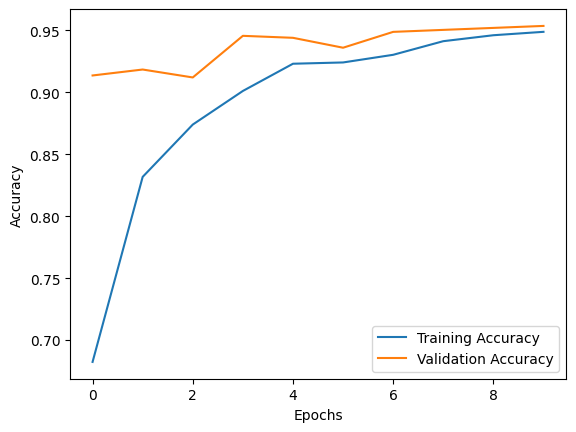

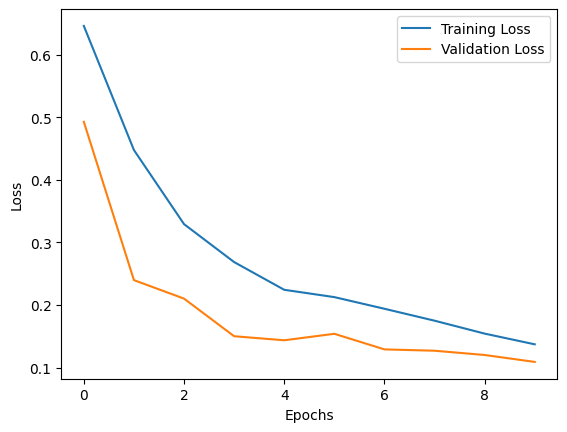

In [22]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [23]:
# Evaluate the model on the test data
import numpy as np
from sklearn.metrics import accuracy_score, classification_report

y_true = []
y_pred = []

# Iterate over the test_generator to get predictions
for images, labels in test_generator:
    y_pred_batch = model.predict(images)
    y_pred_classes_batch = np.argmax(y_pred_batch, axis=1) # Convert probabilities to class labels
    y_true_batch = np.argmax(labels, axis=1)  # Convert one-hot encoded labels to class labels

    y_pred.extend(y_pred_classes_batch)
    y_true.extend(y_true_batch)

    # Break if we have processed all batches
    if len(y_true) >= len(test_generator.classes):
      break

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

# Optionally, print a classification report for more detailed metrics
print(classification_report(y_true, y_pred))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Test Accuracy: 0.9760
              precision    recall  f1-score   support

           0       0.95      1.00      0.98       294
           1       1.00      0.95      0.98       330

    accuracy                           0.98       624
 

In [34]:
# Function to preprocess a single image
def preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(244, 244))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.  # Rescale
    return img_array

# Upload image files
uploaded = files.upload()

# Make predictions for each uploaded image
for filename in uploaded.keys():
    img_path = filename  # Assuming the file is in Colab's runtime environment
    img_preprocessed = preprocess_image(img_path)

    prediction = model.predict(img_preprocessed)
    predicted_class = np.argmax(prediction)

    print(f"Image: {filename}")
    if predicted_class == 0:
      print(f"Predicted Class: AI Generated")
    else:
      print(f"Predicted Class: Real")
    print("-" * 20)

Saving real_1.jpeg to real_1.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Image: real_1.jpeg
Predicted Class: Real
--------------------
